In [1]:
import jax.numpy as jnp
import numpy as onp
import jax
from jax.config import config
config.update("jax_enable_x64", True)

from jax import jit
import jax_cosmo as jc
import matplotlib.pyplot as plt


from modified_redshift import nz_hat
from angular_power import cl_delta
from angular_power import cl_hat
from angular_power import define_cosmo

In [2]:
def plot_jax_nz(nz, z_space):
    func = []
    for z in z_space:
        func.append(nz.pz_fn(z))
        
    plt.plot(z_space, func)
    
    return func

In [3]:
bin_w = 1
zmins = jnp.arange(0, 7, bin_w)
zmaxs = jnp.arange(0+bin_w, 7+bin_w, bin_w)
bin_heights = jnp.array([0,1,1,2,5,3,1])
nzhat = nz_hat(bin_heights, zmins, zmaxs)
dz = 0.01
z_space = jnp.arange(0, 7, dz)

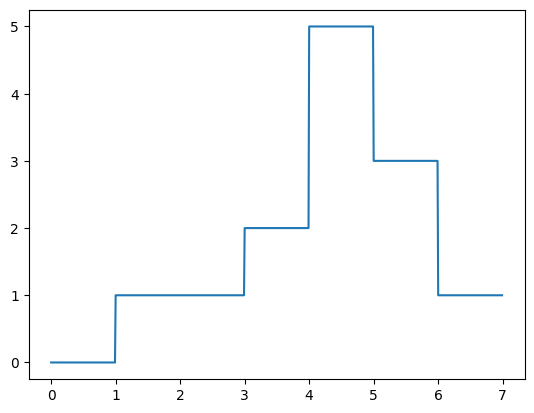

In [4]:
func = plot_jax_nz(nzhat, z_space)

In [5]:
zmins = jnp.array([0, 0.5, 0.6, 3.0, 3.1, 3.5, 4.0, 4.5, 5.5])
zmaxs = jnp.array([0.5, 0.6, 3.0, 3.1, 3.5, 4.0, 4.5, 5.5, 7.0])
bin_heights = jnp.array([1,4,1,3,2,5,4,3,1])
nzhat = nz_hat(bin_heights, zmins, zmaxs)
dz = 0.01
z_space = jnp.arange(0, 7, dz)

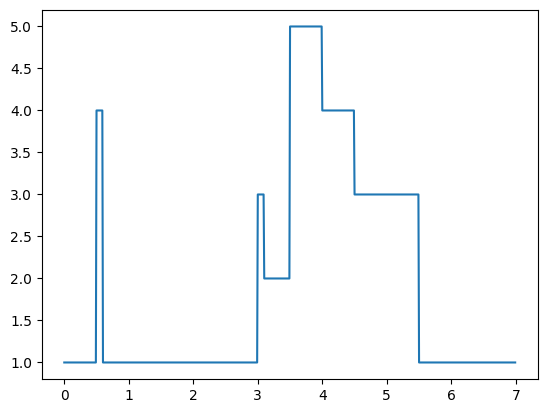

In [6]:
func = plot_jax_nz(nzhat, z_space)

In [7]:
bin_w = 0.5
zmins = jnp.arange(0, 7, bin_w)
zmaxs = jnp.arange(0+bin_w, 7+bin_w, bin_w)
bin_heights = onp.random.normal(3, 0.1, len(zmins))#jnp.arange(0, 7, bin_w)
nzhat = nz_hat(bin_heights, zmins, zmaxs)
dz = 0.05
z_space = jnp.arange(0, 7, dz)

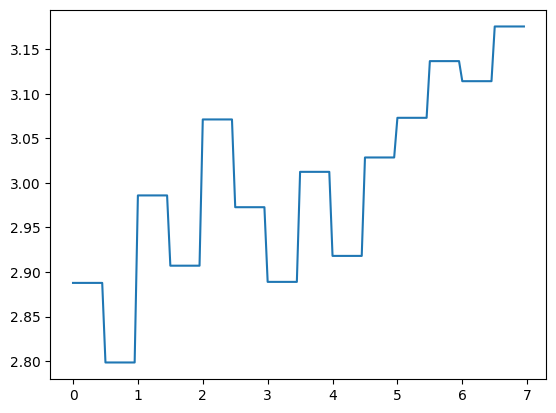

In [8]:
func = plot_jax_nz(nzhat, z_space)

In [9]:
ell = jnp.arange(200, 1000, 1)

In [10]:
cl = cl_hat(define_cosmo(), bin_heights, zmins, zmaxs, ell)

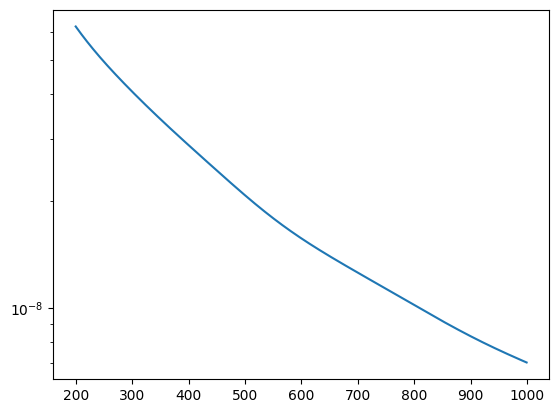

In [11]:
plt.plot(ell, cl)
plt.yscale("log")